In [19]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 3.3273872363487056e-05,
Временя выполнение задачи (с): 436.34000000000003,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 2, 1, 0], '40': [4, 3, 2, 1, 0], '50': [5, 4, 3, 2, 1, 0], '60': [6, 5, 4, 3, 2, 1, 0], '70': [7, 6, 5, 4, 3, 2, 1, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 700, '12': 600, '23': 500, '34': 400, '45': 300, '56': 200, '67': 100}
v_reseive_to_node: [700, 600, 500, 400, 300, 200, 100, 0]
v_sent_to_node: [0, 700, 600, 500, 400, 300, 200, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 65.0, 55.0, 45.0, 35.0, 25.0, 15.0, 5.0]
t_edges: [35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / m

<ipython-input-20-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


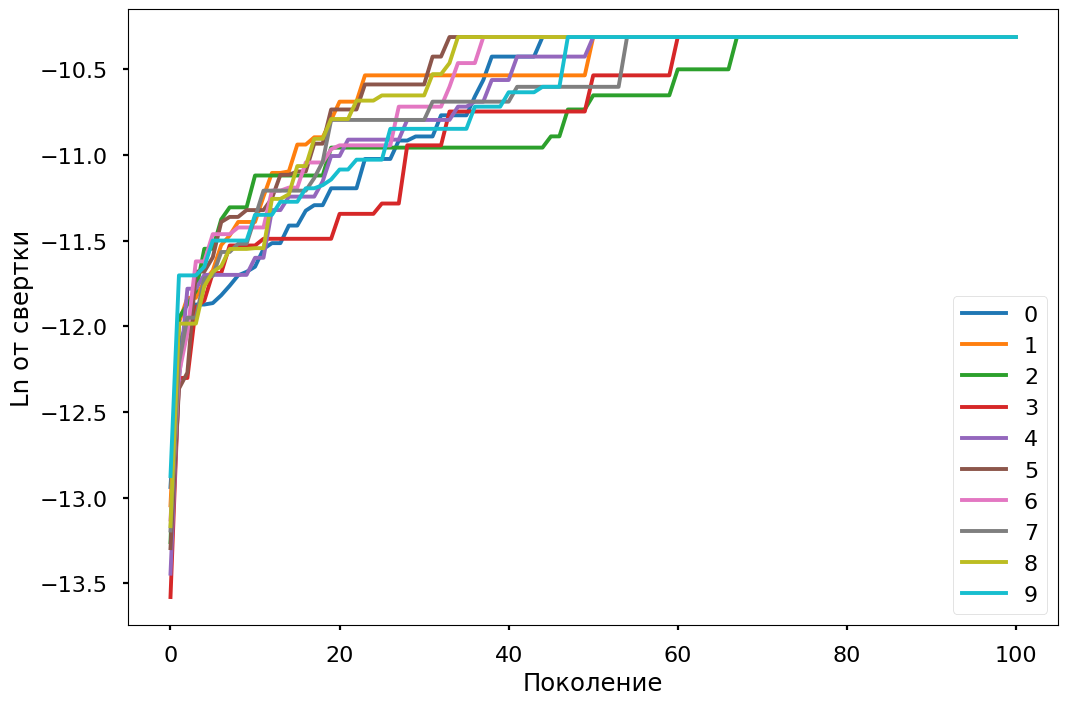

In [20]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

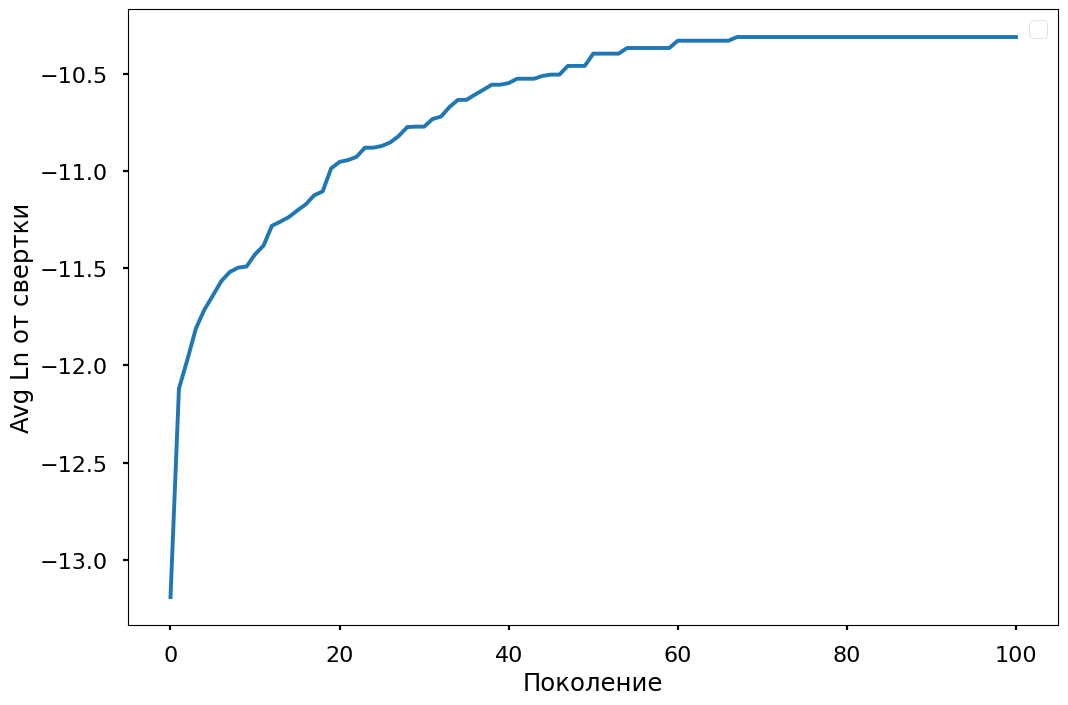

In [21]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

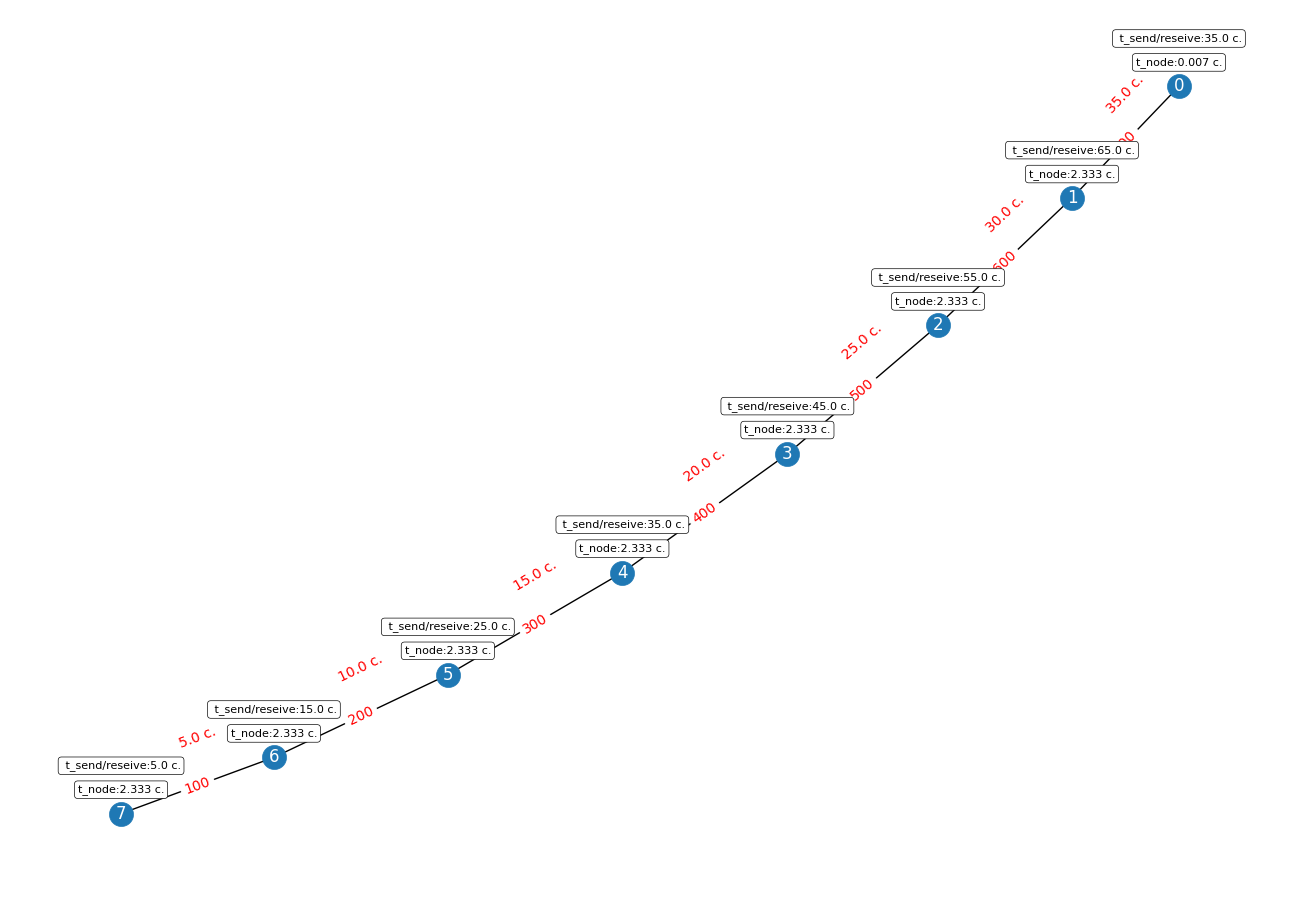

In [22]:
experements[0][-1][-1].draw_result()

In [23]:
print(experements[0][-1][-1])

Cвертка: 3.3273872363487056e-05,
Временя выполнение задачи (с): 436.34000000000003,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 2, 1, 0], '40': [4, 3, 2, 1, 0], '50': [5, 4, 3, 2, 1, 0], '60': [6, 5, 4, 3, 2, 1, 0], '70': [7, 6, 5, 4, 3, 2, 1, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 700, '12': 600, '23': 500, '34': 400, '45': 300, '56': 200, '67': 100}
v_reseive_to_node: [700, 600, 500, 400, 300, 200, 100, 0]
v_sent_to_node: [0, 700, 600, 500, 400, 300, 200, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 65.0, 55.0, 45.0, 35.0, 25.0, 15.0, 5.0]
t_edges: [35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / m

In [24]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        # 'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [25]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

In [26]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 0.00035714285714285714,
Временя выполнение задачи (с): 576.34,
Хромосома: [4 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 2, 1, 0], '40': [4, 3, 2, 1, 0], '50': [5, 4, 3, 2, 1, 0], '60': [6, 5, 4, 3, 2, 1, 0], '70': [7, 6, 5, 4, 3, 2, 1, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 700, '12': 600, '23': 500, '34': 400, '45': 300, '56': 200, '67': 100}
v_reseive_to_node: [3500, 600, 500, 400, 300, 200, 100, 0]
v_sent_to_node: [0, 700, 600, 500, 400, 300, 200, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [175.0, 65.0, 55.0, 45.0, 35.0, 25.0, 15.0, 5.0]
t_edges: [35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:

<ipython-input-27-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


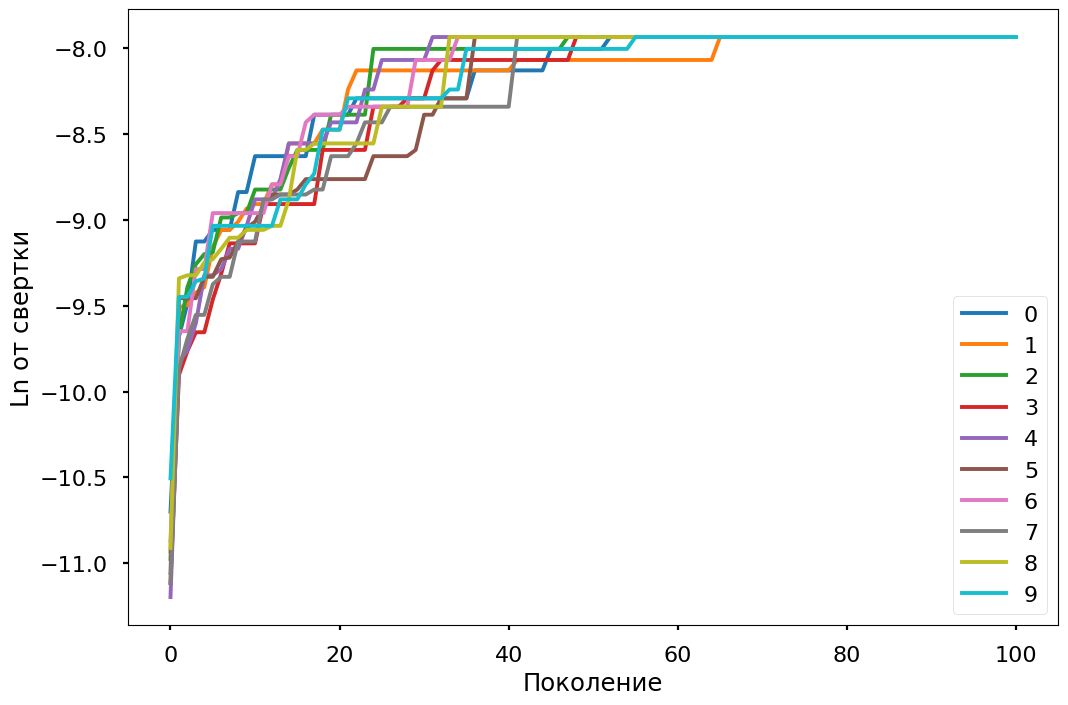

In [27]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

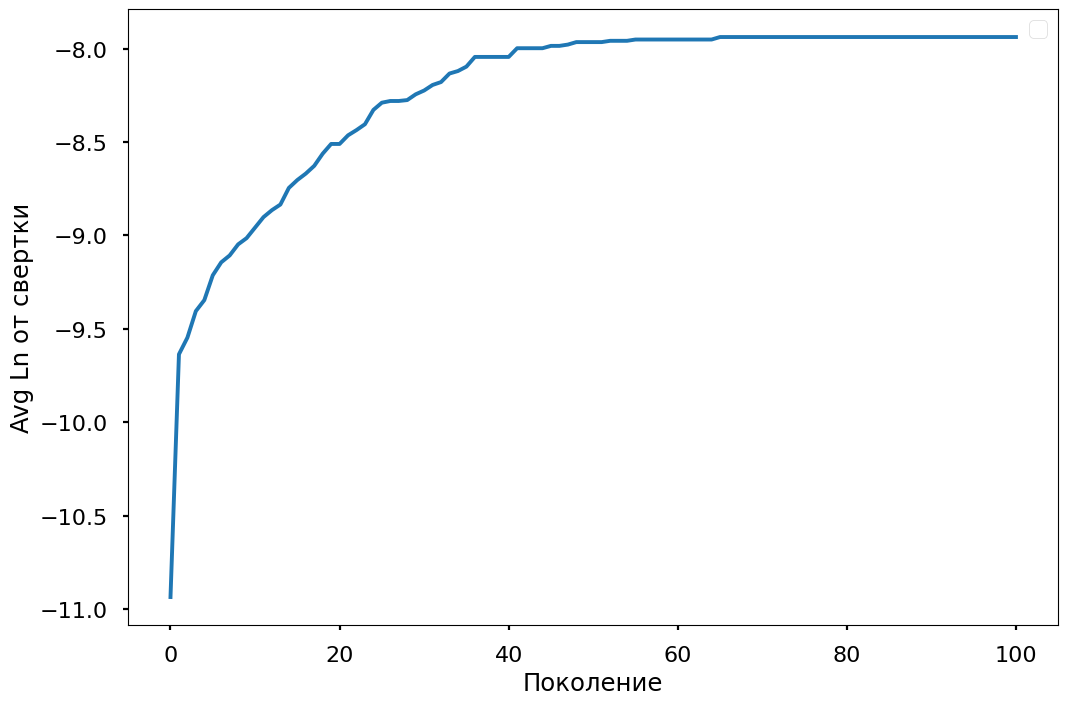

In [28]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

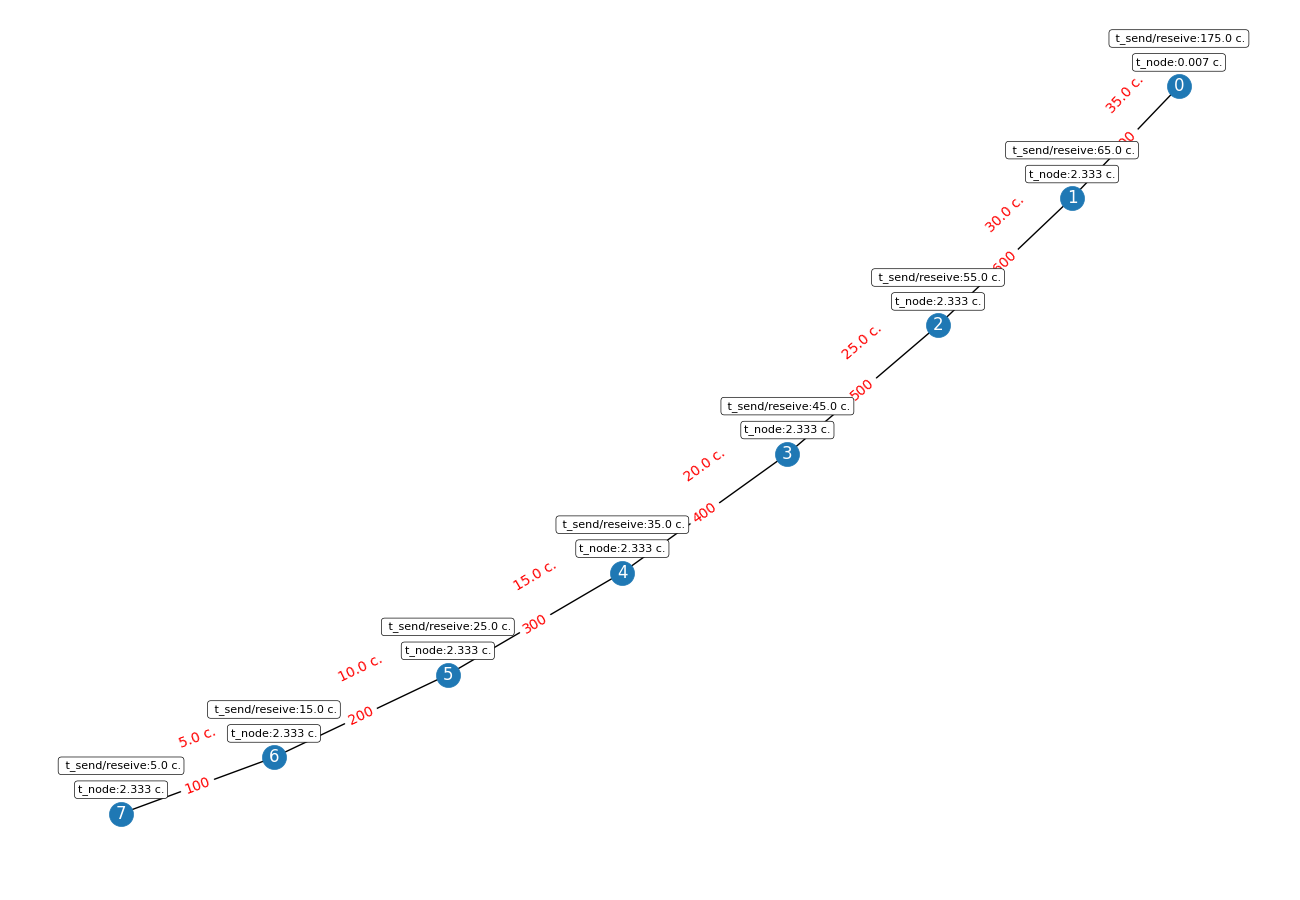

In [29]:
experements[0][-1][-1].draw_result()

In [30]:
print(experements[0][-1][-1])

Cвертка: 0.00035714285714285714,
Временя выполнение задачи (с): 576.34,
Хромосома: [4 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 2, 1, 0], '40': [4, 3, 2, 1, 0], '50': [5, 4, 3, 2, 1, 0], '60': [6, 5, 4, 3, 2, 1, 0], '70': [7, 6, 5, 4, 3, 2, 1, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 700, '12': 600, '23': 500, '34': 400, '45': 300, '56': 200, '67': 100}
v_reseive_to_node: [3500, 600, 500, 400, 300, 200, 100, 0]
v_sent_to_node: [0, 700, 600, 500, 400, 300, 200, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [175.0, 65.0, 55.0, 45.0, 35.0, 25.0, 15.0, 5.0]
t_edges: [35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:

In [31]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [32]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

In [33]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 1.188352584410252e-08,
Временя выполнение задачи (с): 436.34000000000003,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 2, 1, 0], '40': [4, 3, 2, 1, 0], '50': [5, 4, 3, 2, 1, 0], '60': [6, 5, 4, 3, 2, 1, 0], '70': [7, 6, 5, 4, 3, 2, 1, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 700, '12': 600, '23': 500, '34': 400, '45': 300, '56': 200, '67': 100}
v_reseive_to_node: [700, 600, 500, 400, 300, 200, 100, 0]
v_sent_to_node: [0, 700, 600, 500, 400, 300, 200, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 65.0, 55.0, 45.0, 35.0, 25.0, 15.0, 5.0]
t_edges: [35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / mi

<ipython-input-34-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


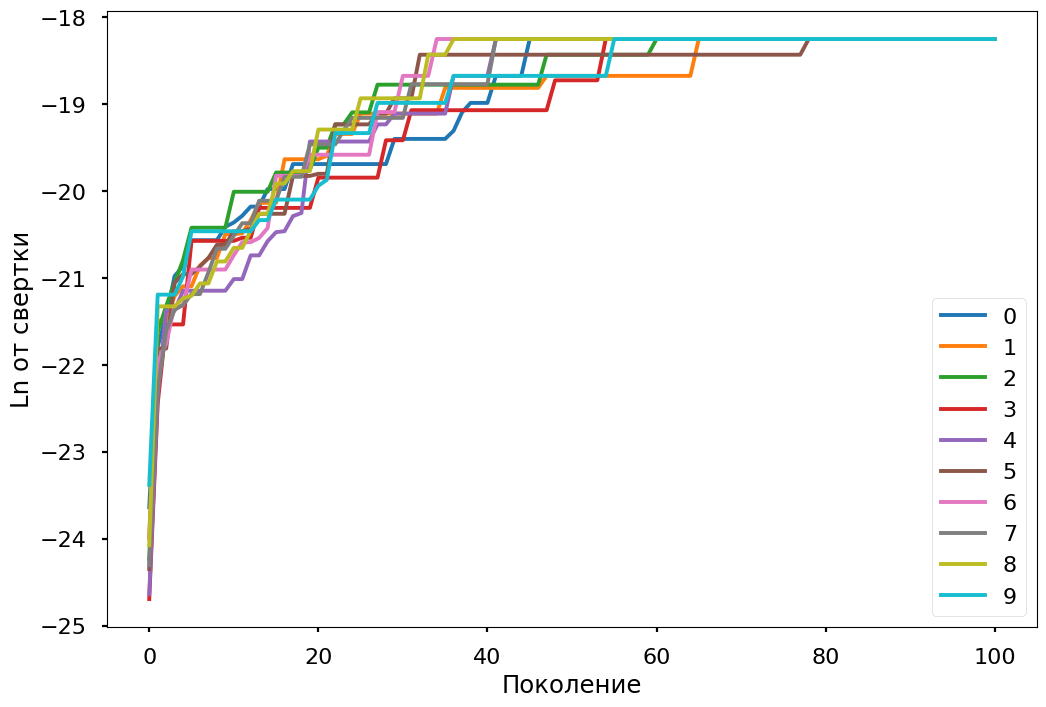

In [34]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

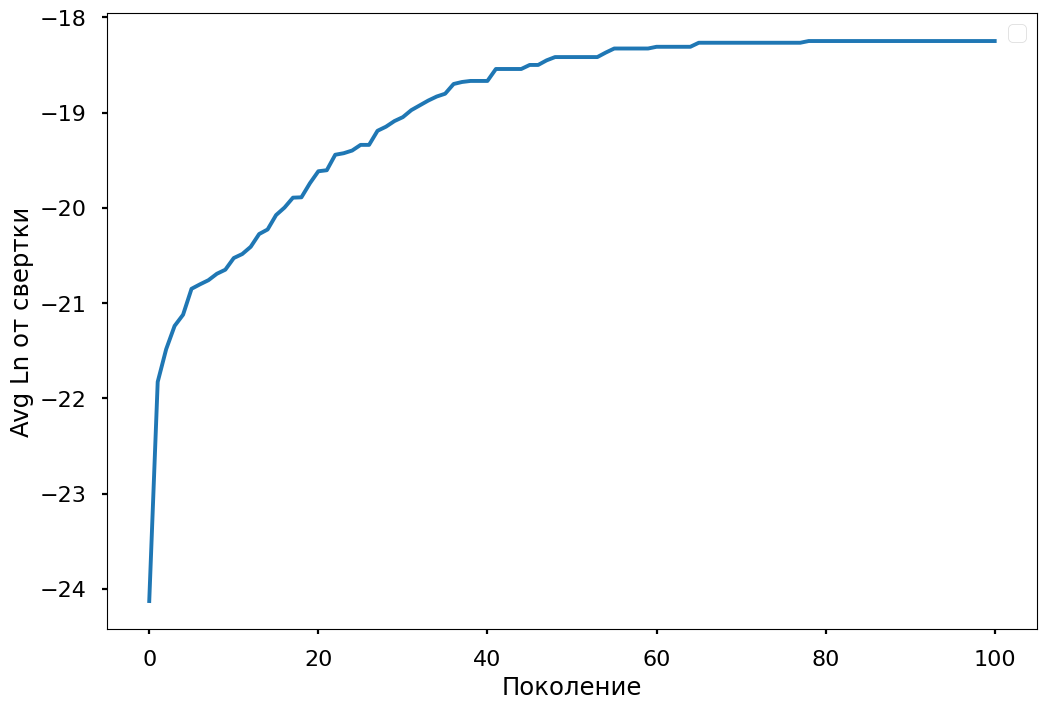

In [35]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

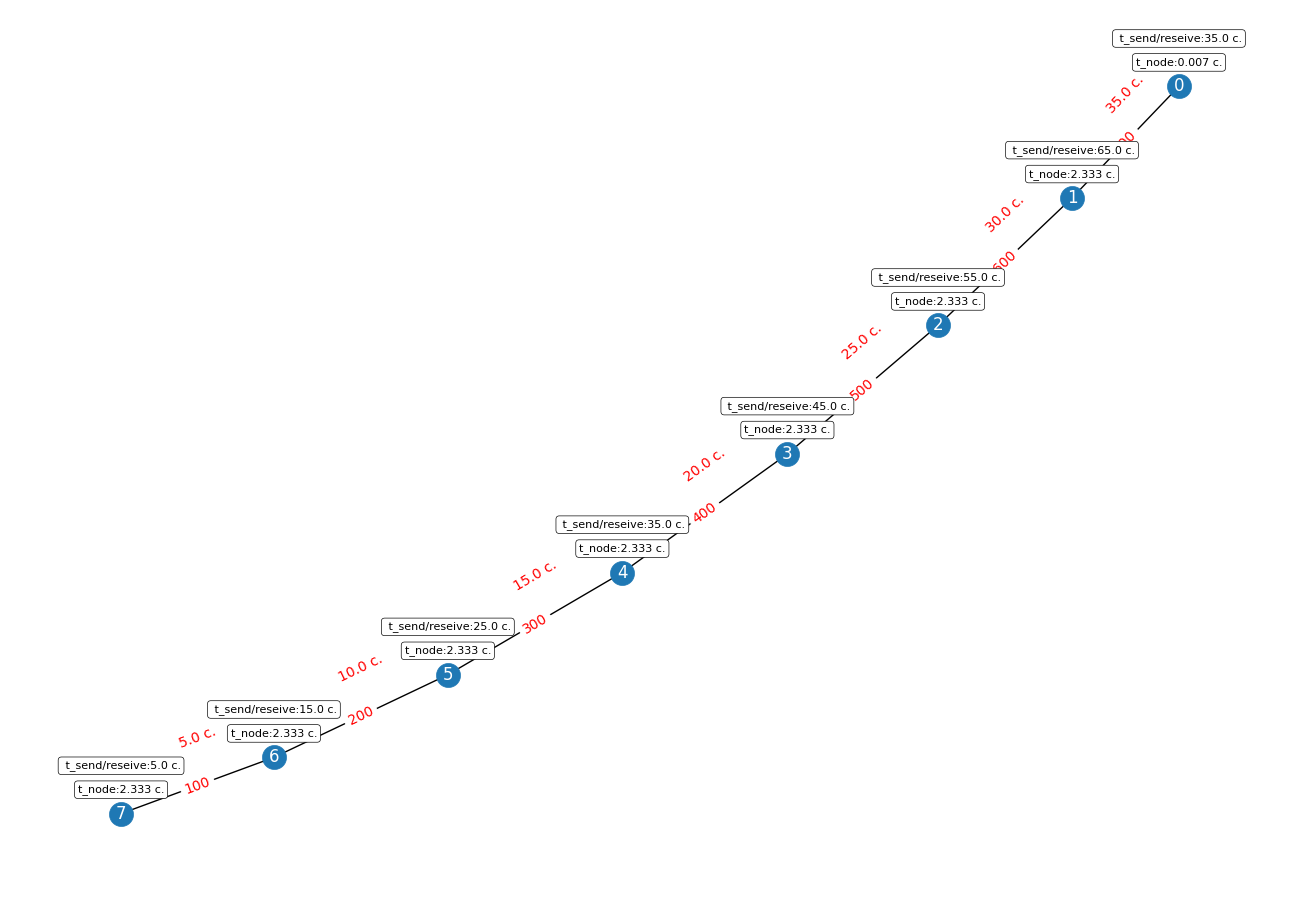

In [36]:
experements[0][-1][-1].draw_result()

In [37]:
print(experements[0][-1][-1])

Cвертка: 1.188352584410252e-08,
Временя выполнение задачи (с): 436.34000000000003,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 2, 1, 0], '40': [4, 3, 2, 1, 0], '50': [5, 4, 3, 2, 1, 0], '60': [6, 5, 4, 3, 2, 1, 0], '70': [7, 6, 5, 4, 3, 2, 1, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 700, '12': 600, '23': 500, '34': 400, '45': 300, '56': 200, '67': 100}
v_reseive_to_node: [700, 600, 500, 400, 300, 200, 100, 0]
v_sent_to_node: [0, 700, 600, 500, 400, 300, 200, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 65.0, 55.0, 45.0, 35.0, 25.0, 15.0, 5.0]
t_edges: [35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / mi